In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
path = "~/cath_results.csv"
df = pd.read_csv(path)

In [4]:
print(df.shape)
df.head()

(31885, 4)


,pdb_id,tmscore,plddt,seqlen
0,2w01B00,0.9833,78.5494,197
1,2m9kA00,0.8271,75.1489,93
2,2f5xA01,0.8663,59.1610,170
3,2pslA00,0.4279,38.4049,217
4,3nrvA00,0.4996,74.3338,126


Text(0.5, 1.0, 'ESMFold pLDDT, complete CATH dataset')

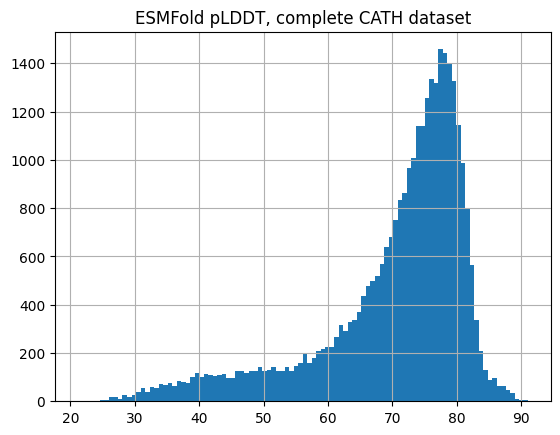

In [5]:
df.plddt.hist(bins=100)
plt.title("ESMFold pLDDT, complete CATH dataset")

Text(0.5, 1.0, 'ESMFold Predicted Structure TM-Score, complete CATH dataset')

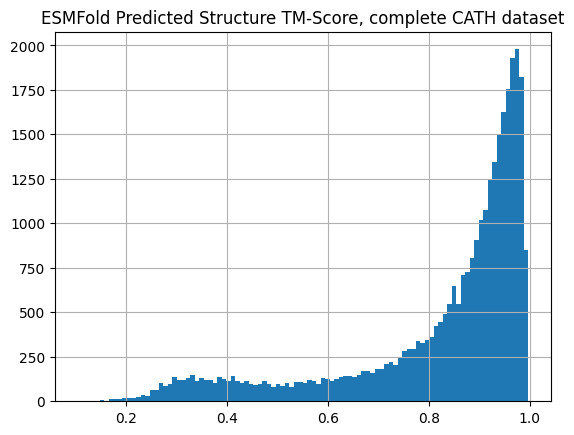

In [6]:
df.tmscore.hist(bins=100)
plt.title("ESMFold Predicted Structure TM-Score, complete CATH dataset")

Text(0.5, 1.0, 'Sequence length and ESMFold predicted structure TM-Score')

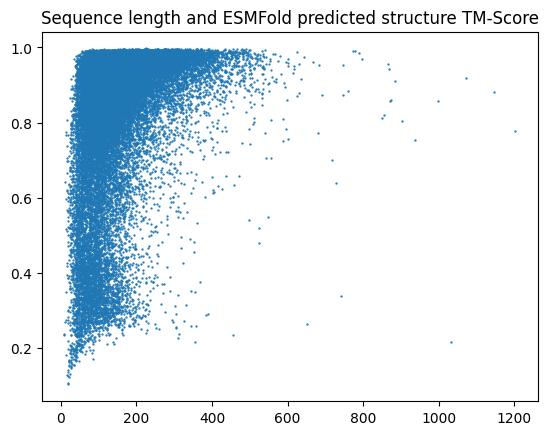

In [7]:
plt.scatter(x=df.seqlen, y=df.tmscore, s=0.4)
plt.title("Sequence length and ESMFold predicted structure TM-Score")

<Axes: xlabel='plddt', ylabel='tmscore'>

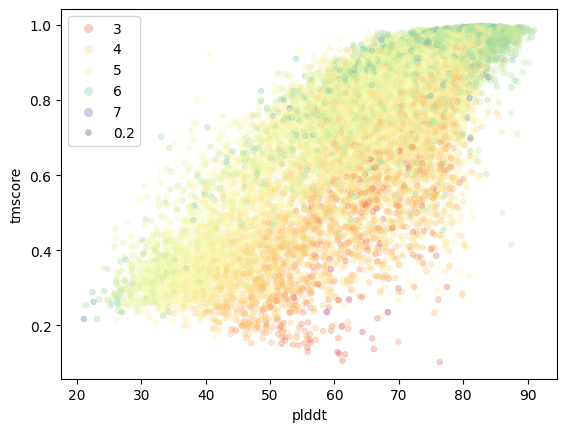

In [23]:
import seaborn as sns
log_seqlen = np.log(df.seqlen.values)
sns.scatterplot(x="plddt", y="tmscore", data=df, size=0.2, alpha=0.3, edgecolor=None, palette="Spectral", hue=log_seqlen)

In [24]:
np.exp(5)

148.4131591025766

<Axes: >

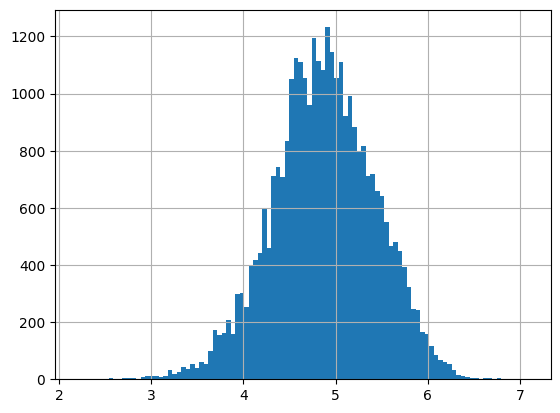

In [28]:
import numpy as np
np.log(df.seqlen).hist(bins=100)

In [30]:
filtered = df[df.tmscore > 0.85]
print(filtered.shape)
filtered.head()

(20141, 4)


,pdb_id,tmscore,plddt,seqlen
0,2w01B00,0.9833,78.5494,197
2,2f5xA01,0.8663,59.1610,170
6,4p2iA00,0.9006,75.2591,117
7,1zatA02,0.9704,80.8164,123
9,1gccA00,0.8861,75.9980,63


1146


<Axes: >

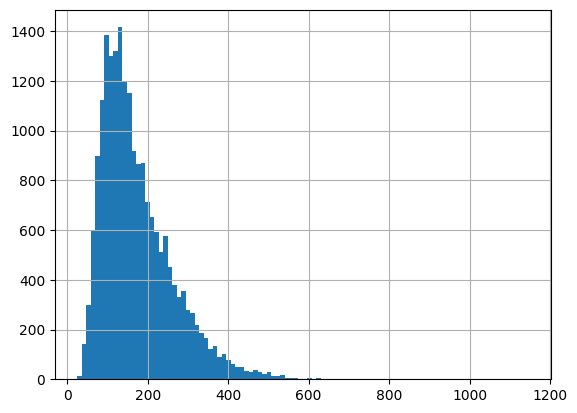

In [32]:
print(filtered.seqlen.max())
filtered.seqlen.hist(bins=100)

In [36]:
with open("/homefs/home/lux70/accurate_cath_ids.txt", "w") as f:
    for pid in filtered.pdb_id:
        f.write(f"{pid}\n")

In [38]:
!head -n 20 /homefs/home/lux70/accurate_cath_ids.txt

2w01B00
2f5xA01
4p2iA00
1zatA02
1gccA00
1fobA00
2hw6A01
1iyjB03
5l6gA02
1ypoA00
3ugvA01
2lm3A00
1tdjA02
3mczA01
5givB00
1nrkA03
2gn0B01
1or4B00
3iayA07
2e2aC00
